# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Usare el método "pd.read_csv()" para leer los DatraFrames agregando el parametro de separador'sep=";" para que sea más facil leer los datos, luego usare .info() para ver que información me devulve, en base a eso y a los siguientes requerimientos seguiré avanzando.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
departments = pd.read_csv("/datasets/departments.csv", sep=";")
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")

In [3]:
# mostrar información del DataFrame
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrameproducts.info()
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFramedepartments.info()
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Se puede observar que no hay datos nulos en ningun DataFrame, lo que a primera vista nos da la impresion de que los datoes estan completos y depurados, pero para estar 100% seguro de eso habria que examinar cada DataFrame por separado


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Sseguiré los pasos estándar para procesar datos, verificar los tipos de datos, identificar y completa los valores ausentes e identifica y elimina los valores duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
 # Revisa si hay pedidos duplicados
print(orders[orders['order_id'].duplicated(keep=False)])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay 15 pedidos duplicados, que coinciden con los user_id pero solo se duplican el dow 3 a las 2

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(len(orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]))


121


¿Qué sugiere este resultado?


La verdad no mucho, el DataFrame tiene 478.967 filas, es decir 478.967 pedidos, de esos pedidos 121 es un numero muy pequeño, más aún cuando aun no depuramos los datos eliminando los duplicados, verificando los nombres de las columnas, contando valores ausentes etc. Despues de la limpieza podremos sacar más conclusiones

In [10]:
# Elimina los pedidos duplicados
orders_sin_pedidos_duplicados = orders.drop_duplicates(subset='order_id', keep='first').reset_index(drop=True)
print(orders_sin_pedidos_duplicados)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478947   3210681     5617             5          1                 14   
478948   3270802   112087             2          3                 13   
478949    885349    82944            16          2                 11   
478950    216274     4391             3          3                  8   
478951   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
# Vuelve a verificar si hay filas duplicadas
df_sin_pedidos_duplicados= orders_sin_pedidos_duplicados.duplicated().sum()
print("Número de filas duplicadas:",df_sin_pedidos_duplicados)

Número de filas duplicadas: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
ids_verificados=orders_sin_pedidos_duplicados['order_id'].duplicated().sum()
print("Número de IDs duplicados:",ids_verificados)

Número de IDs duplicados: 0


Identifiqué y eliminé los duplicados

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Número de filas duplicadas:', products.duplicated().sum())

Número de filas duplicadas: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print('Número de IDs de departamento duplicados:', products['department_id'].duplicated().sum())


Número de IDs de departamento duplicados: 49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicados = products['product_name'].str.upper().duplicated()
nombres_duplicados = products.loc[duplicados, 'product_name']
print(nombres_duplicados)

71                                                   NaN
109                                                  NaN
296                                                  NaN
416                                                  NaN
436                                                  NaN
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 1361, dtype: object


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
filtro_1_duplicated = products['product_name'].str.upper().duplicated()
filtro_2_duplicated = products['product_name'].isna()

duplicados = products[(filtro_1_duplicated) & ~(filtro_2_duplicated)].shape[0]
print("Número de nombres duplicados de productos no faltantes:", duplicados)

Número de nombres duplicados de productos no faltantes: 104


Solo me estoy limitando a lo que se me ha pedido asi que solo busqué si habían filas totalmemte duplicada en el DataFrame, ádemas de buscar, identificar y cambiar a mayuscula los nnombres de productos duplicados que hay en la columna 'product_name' los cuales son muchos 1257

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', departments.duplicated().sum())

Número de filas duplicadas: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
# El DF "departments" no tiene IDs de productos, sin embargo no hay dublicadosen sus dos únicas columnas (department_id o en departmet)
print('Número de duplicados en columna "department_id":', departments['department_id'].duplicated().sum())
print('Número de duplicados en columna "department":', departments['department'].duplicated().sum())


Número de duplicados en columna "department_id": 0
Número de duplicados en columna "department": 0


Es un DataFrame sin duplicados y bastante pequeño sin datos duplicados, ausentes ni nulos


### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', aisles.duplicated().sum())

Número de filas duplicadas: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Número de duplicados en columna "aisle_id":', aisles['aisle_id'].duplicated().sum())

Número de duplicados en columna "aisle_id": 0


Busqué duplicados y no se encontraron

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', order_products.duplicated().sum())


Número de filas duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
columns = ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
duplicados_ocultos = order_products.duplicated(subset=columns)
print("Número de duplicados engañosos: ", duplicados_ocultos.sum())


Número de duplicados engañosos:  0


Hice una busqueda exaustiva buscando duplicados engañosos la cual arrojó que no los hay.

## Encuentrar y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
valores_ausentes=products["product_name"].isnull().sum()
print("Hay",valores_ausentes,"en la columna 'product_name'")

Hay 1258 en la columna 'product_name'


Son 1258 valores ausentes en un DataFrame con 49,694. Esto es el 2.53%. A simple vista, no parece muy relevante, pero hay que ver a qué se relacionan esos valores ausentes para sacar más conclusiones.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
valores_ausentes= products.loc[(products['product_name'].isnull()) & (products['aisle_id'] == 100), ['product_name', 'aisle_id']]
print(f"Las filas con valores ausentes en la columna 'product_name' y un valor de 100 en la columna 'aisle_id' son:\n\n{valores_ausentes}")


Las filas con valores ausentes en la columna 'product_name' y un valor de 100 en la columna 'aisle_id' son:

      product_name  aisle_id
37             NaN       100
71             NaN       100
109            NaN       100
296            NaN       100
416            NaN       100
...            ...       ...
49552          NaN       100
49574          NaN       100
49640          NaN       100
49663          NaN       100
49668          NaN       100

[1258 rows x 2 columns]


Si, todos los valores ausentes se relacionan al pasillo 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
valores_ausentes= products.loc[(products['product_name'].isnull()) & (products['department_id'] == 21), ['product_name', 'department_id']]
print(f"Las filas con valores ausentes en la columna 'product_name' y un valor de 100 en la columna 'aisle_id' son:\n\n{valores_ausentes}")


Las filas con valores ausentes en la columna 'product_name' y un valor de 100 en la columna 'aisle_id' son:

      product_name  department_id
37             NaN             21
71             NaN             21
109            NaN             21
296            NaN             21
416            NaN             21
...            ...            ...
49552          NaN             21
49574          NaN             21
49640          NaN             21
49663          NaN             21
49668          NaN             21

[1258 rows x 2 columns]


Si, todos los valores ausentes se relacionan al valor 21 de la columna 'departmet_id'

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
valores_ausentes= products.loc[(products['product_name'].isnull()) & (products['aisle_id'] == 100) & (products['department_id'] == 21), ['product_name', 'aisle_id', 'department_id']]
print(f"Las filas con valores ausentes en la columna 'product_name' y un valor de 100 en la columna 'aisle_id' son:\n\n{valores_ausentes}")



Las filas con valores ausentes en la columna 'product_name' y un valor de 100 en la columna 'aisle_id' son:

      product_name  aisle_id  department_id
37             NaN       100             21
71             NaN       100             21
109            NaN       100             21
296            NaN       100             21
416            NaN       100             21
...            ...       ...            ...
49552          NaN       100             21
49574          NaN       100             21
49640          NaN       100             21
49663          NaN       100             21
49668          NaN       100             21

[1258 rows x 3 columns]


Describe brevemente cuáles son tus hallazgos.

Hay que reponer el pasillo 21 y ver por que todos los valores ausentes son de ese pasillo y ese departameto

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)


print(products.loc[products['product_name'] == 'Unknown', ['product_name']])


      product_name
37         Unknown
71         Unknown
109        Unknown
296        Unknown
416        Unknown
...            ...
49552      Unknown
49574      Unknown
49640      Unknown
49663      Unknown
49668      Unknown

[1258 rows x 1 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Ahora, todos los valores ausentes que hallé en la columna 'product_name' han sido cambiados por 'Unknown'.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(orders_sin_pedidos_duplicados.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orders_sin_pedidos_duplicados.loc[(orders_sin_pedidos_duplicados['order_number'].isnull()) & (orders_sin_pedidos_duplicados['order_id'] != 1)])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al parecer todos los valores ausentes estan en la columna 'days_since_prior_order'  y son 28819 de los 3421083 valores de la columna 

### `order_products` data frame

In [30]:

print(order_products.isnull().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:

print(order_products['add_to_cart_order'].agg(['min', 'max']))



min     1.0
max    64.0
Name: add_to_cart_order, dtype: float64


Se puede decir que los clientes ordenan hasta 64 articulos

In [32]:

new_order_products=order_products[order_products['add_to_cart_order'].isna()]['order_id']
print(new_order_products.isnull().sum())

0


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
ids_perdidos= all(value > 64 for value in order_products[order_products['order_id'].isna()]['add_to_cart_order'])
print('¿Todos los pedidos con valores ausentes tienen más de 64 productos?')
print(ids_perdidos)

print('Los IDs de pedidos con datos ausentes son los siguientes:')
ids_perdidos_agrupados = order_products[order_products.isna().any(axis=1)]['order_id'].unique()
print(ids_perdidos_agrupados)

#----------Este me la ganó, aquí necesitaré ayuda------------


¿Todos los pedidos con valores ausentes tienen más de 64 productos?
True
Los IDs de pedidos con datos ausentes son los siguientes:
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
print("Valores ausentes en 'add_to_cart_order':", order_products['add_to_cart_order'].isna().sum(), "y Tipo de datos de 'add_to_cart_order':", order_products['add_to_cart_order'].dtype)

Valores ausentes en 'add_to_cart_order': 0 y Tipo de datos de 'add_to_cart_order': int64


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Si bien en genereal hay datos faltantes, datos nulos y datos duplicados en los DaraFrame, son porcentajes menores y producto de inconsistencias a la hora de recoger los datos, un ejemplo de esto es los datos duplicados a las 2pm en el Dataframe 'orders'


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# 
1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### Verifica que los valores sean sensibles

In [35]:
print(orders_sin_pedidos_duplicados[(orders_sin_pedidos_duplicados['order_hour_of_day'] < 0) | (orders_sin_pedidos_duplicados['order_hour_of_day'] > 23)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [36]:
print(orders_sin_pedidos_duplicados[(orders_sin_pedidos_duplicados['order_dow'] < 0) | (orders_sin_pedidos_duplicados['order_dow'] > 6)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Conclusiones

Los datos son sensibles

### Para cada hora del día, ¿cuántas personas hacen órdenes?

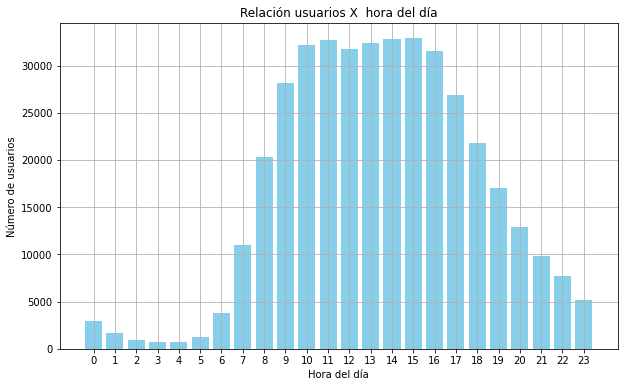

In [37]:
personas_por_hora = orders_sin_pedidos_duplicados.groupby('order_hour_of_day')['user_id'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(personas_por_hora.index, personas_por_hora.values, color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de usuarios')
plt.title('Relación usuarios X  hora del día')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones

El rango horario con mayor concentración de pedido es de 10:00-16:00

### ¿Qué día de la semana compran víveres las personas?

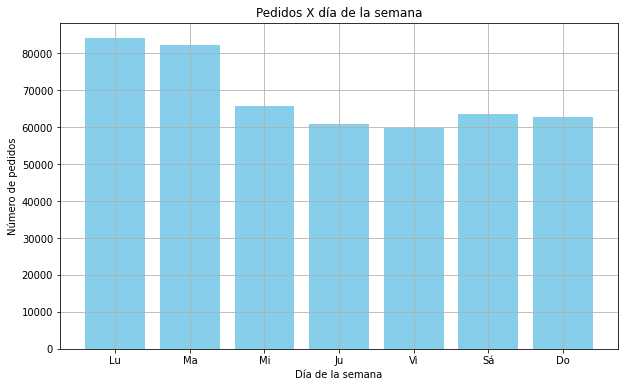

In [38]:
dias = ['Lu', 'Ma', 'Mi', 'Ju', 'Vi', 'Sá', 'Do']

orders_per_day = orders_sin_pedidos_duplicados.groupby('order_dow')['order_id'].count()


plt.figure(figsize=(10, 6))
plt.bar(orders_per_day.index, orders_per_day.values, color='skyblue', tick_label=dias)
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.title('Pedidos X día de la semana')
plt.grid(True)
plt.show()


Conclusiones

El día de la semana en que más viveres compra la gente es el Lunes  

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

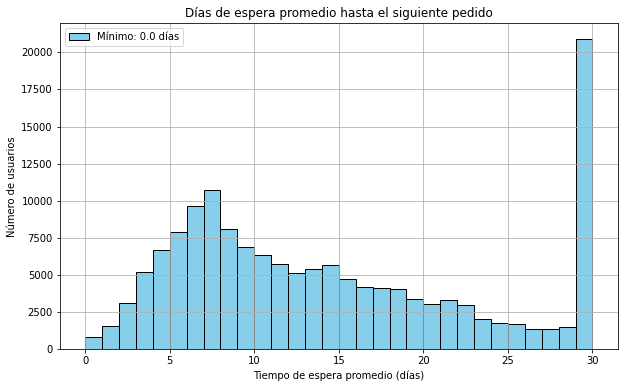

In [39]:

average_wait_time = orders_sin_pedidos_duplicados.groupby('user_id')['days_since_prior_order'].mean()

min_wait = average_wait_time.min()
max_wait = average_wait_time.max()

plt.figure(figsize=(10, 6))
plt.hist(average_wait_time, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tiempo de espera promedio (días)')
plt.ylabel('Número de usuarios')
plt.title('Días de espera promedio hasta el siguiente pedido')

plt.legend([f'Mínimo: {min_wait} días', f'Máximo: {max_wait} días'])

plt.grid(True)
plt.show()

Conclusiones

La gente en su mayoria hace compras mensuales por la aplicación

# Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

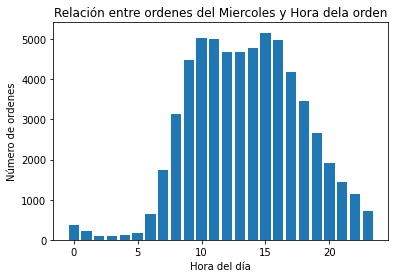

In [40]:

orders_dow_3 = orders_sin_pedidos_duplicados[orders_sin_pedidos_duplicados['order_dow'] == 3]

hour_counts = orders_dow_3['order_hour_of_day'].value_counts().sort_index()

plt.bar(hour_counts.index, hour_counts.values)

plt.xlabel('Hora del día')
plt.ylabel('Número de ordenes')
plt.title('Relación entre ordenes del Miercoles y Hora dela orden')
plt.show()

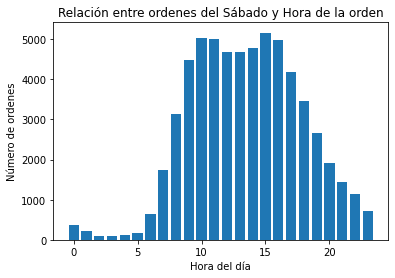

In [41]:

orders_dow_6 = orders_sin_pedidos_duplicados[orders_sin_pedidos_duplicados['order_dow'] == 3]

hour_counts = orders_dow_6['order_hour_of_day'].value_counts().sort_index()

plt.bar(hour_counts.index, hour_counts.values)

plt.xlabel('Hora del día')
plt.ylabel('Número de ordenes')
plt.title('Relación entre ordenes del Sábado y Hora de la orden')
plt.show()

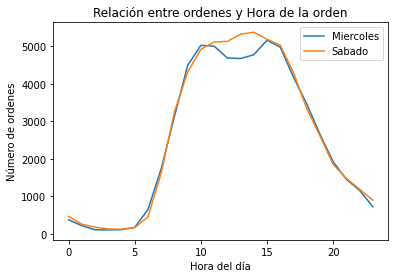

In [42]:
orders_dow_3 = orders_sin_pedidos_duplicados[orders_sin_pedidos_duplicados['order_dow'] == 3]
hour_counts_3 = orders_dow_3['order_hour_of_day'].value_counts().sort_index()


orders_dow_6 = orders_sin_pedidos_duplicados[orders_sin_pedidos_duplicados['order_dow'] == 6]
hour_counts_6 = orders_dow_6['order_hour_of_day'].value_counts().sort_index()


plt.plot(hour_counts_3.index, hour_counts_3.values, label='Miercoles')


plt.plot(hour_counts_6.index, hour_counts_6.values, label='Sabado')

plt.xlabel('Hora del día')
plt.ylabel('Número de ordenes')
plt.title('Relación entre ordenes y Hora de la orden')
plt.legend()
plt.show()




Conclusiones

Se puede ver que el Sábado hay más pedido que el día miércoles y que hace una curva tipo campana invertida más regular, en cambio, el miércoles no solo se hacen menos pedidos sino que también hay un pick a las 10:00 luego bajón y casi llegando a las 15:00 hrs sube nuevamente para ir decayendo de forma regular

### ¿Cuál es la distribución para el número de pedidos por cliente?

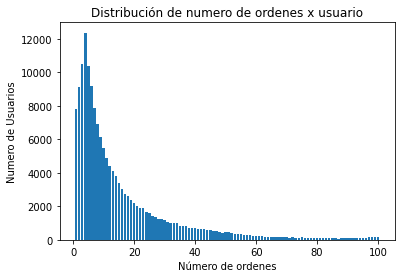

In [43]:
order_counts = orders_sin_pedidos_duplicados.groupby('user_id')['order_number'].max()

user_counts = order_counts.value_counts().sort_index()

plt.bar(user_counts.index, user_counts.values)

plt.xlabel('Número de ordenes')
plt.ylabel('Numero de Usuarios')
plt.title('Distribución de numero de ordenes x usuario')
plt.show()

conclusiones

La verdad aqui se ve qué no son muchos lo productos que repiten usuarios que hagan más de una orden, eso puede darnos un indicativo por ejemplo que es es fácil armar un carrito en la web, ya que pocos clientes necesitan ordenar nuevamente por algo olvidado.

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
top_20_products = order_products['product_id'].value_counts().head(20).index.tolist()

top_20_product_names = products[products['product_id'].isin(top_20_products)][['product_id', 'product_name']]

top_20_product_names = top_20_product_names.set_index('product_id').loc[top_20_products].reset_index()

print(top_20_product_names)


    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


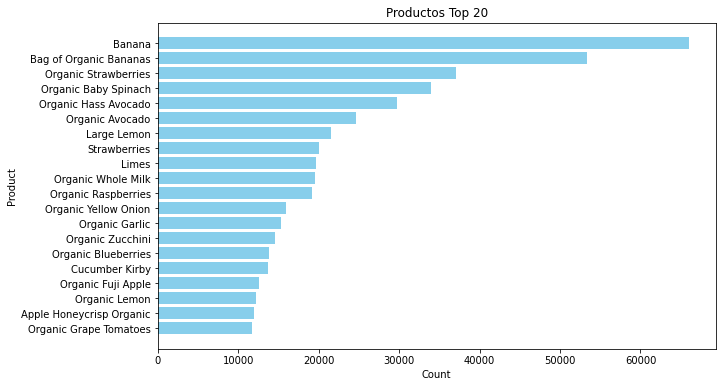

In [45]:
top_20_products = order_products['product_id'].value_counts().head(20)


top_20_product_names = products[products['product_id'].isin(top_20_products.index)][['product_id', 'product_name']]
top_20_product_names = top_20_product_names.set_index('product_id').loc[top_20_products.index].reset_index()


top_20 = pd.DataFrame({'product_name': top_20_product_names['product_name'], 'count': top_20_products.values})


plt.figure(figsize=(10,6))
plt.barh(top_20['product_name'], top_20['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Productos Top 20')
plt.gca().invert_yaxis()  # Invierte el eje y para que el producto más popular esté en la parte superior
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Todo en orden en esta sección `B`.
</div>

Es gente muy saludable la que usa esta plataforma, las frutas y y verduras organicas estanb en los Top20

¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
# Combiné  el DF order_products y "orders_sin_pedidos_duplicados" que es donde esta depurado el df "instacart_orders.csv" en la variable, "ordenes_totales"

ordenes_totales = pd.merge(order_products, orders_sin_pedidos_duplicados, on='order_id')


conteo_ordenes= ordenes_totales.groupby('order_id')['product_id'].count()


print(conteo_ordenes.describe().round(1))


count    450046.0
mean         10.1
std           7.5
min           1.0
25%           5.0
50%           8.0
75%          14.0
max         127.0
Name: product_id, dtype: float64


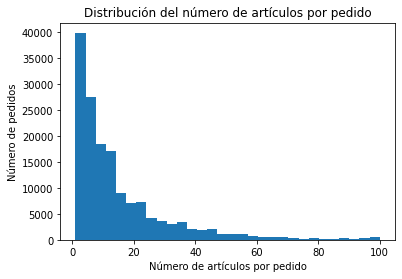

In [47]:
ordenes_totales = pd.merge(order_products, orders_sin_pedidos_duplicados, on='order_id')


conteo_ordenes = ordenes_totales.groupby('order_id')['product_id'].count()

# Mostrar la distribución
plt.hist(order_counts, bins=30)
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Número de pedidos')
plt.title('Distribución del número de artículos por pedido')
plt.show()

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
reordered_products = order_products[order_products['reordered'] == 1]


product_counts = reordered_products['product_id'].value_counts()


top_20_product_ids = product_counts.head(20).index


top_20_products = products[products['product_id'].isin(top_20_product_ids)]


top_20_products = top_20_products.set_index('product_id')
top_20_products['count'] = product_counts


top_20_products = top_20_products.sort_values('count', ascending=False)


top_20_products = top_20_products[['product_name', 'count']]

print(top_20_products)

                        product_name  count
product_id                                 
24852                         Banana  55763
13176         Bag of Organic Bananas  44450
21137           Organic Strawberries  28639
21903           Organic Baby Spinach  26233
47209           Organic Hass Avocado  23629
47766                Organic Avocado  18743
27845             Organic Whole Milk  16251
47626                    Large Lemon  15044
27966            Organic Raspberries  14748
16797                   Strawberries  13945
26209                          Limes  13327
22935           Organic Yellow Onion  11145
24964                 Organic Garlic  10411
45007               Organic Zucchini  10076
49683                 Cucumber Kirby   9538
28204             Organic Fuji Apple   8989
8277        Apple Honeycrisp Organic   8836
39275            Organic Blueberries   8799
5876                   Organic Lemon   8412
49235            Organic Half & Half   8389


### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?


In [49]:
total_orders = order_products['product_id'].value_counts()

reordered_products = order_products[order_products['reordered'] == 1]


reorder_counts = reordered_products['product_id'].value_counts()

reorder_proporcion = reorder_counts / total_orders

reorder_proporcion_df = pd.DataFrame({'product_id': reorder_proporcion.index, 'reorder_ratio': reorder_proporcion.values})

reorder_proporcion_df = reorder_proporcion_df.merge(products, on='product_id')


print(reorder_proporcion_df)


       product_id  reorder_ratio  \
0               1       0.564286   
1               2            NaN   
2               3       0.738095   
3               4       0.510204   
4               7       0.500000   
...           ...            ...   
45568       49690       0.800000   
45569       49691       0.430556   
45570       49692       0.416667   
45571       49693       0.440000   
45572       49694       0.333333   

                                            product_name  aisle_id  \
0                             Chocolate Sandwich Cookies        61   
1                                       All-Seasons Salt       104   
2                   Robust Golden Unsweetened Oolong Tea        94   
3      Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4                         Pure Coconut Water With Orange        98   
...                                                  ...       ...   
45568                      HIGH PERFORMANCE ENERGY DRINK        64   
45569  

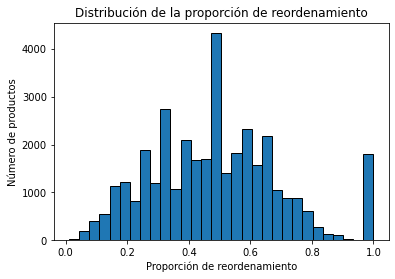

In [50]:
# Mostrar la distribución
plt.hist(reorder_proporcion_df['reorder_ratio'], bins=30, edgecolor='black')
plt.xlabel('Proporción de reordenamiento')
plt.ylabel('Número de productos')
plt.title('Distribución de la proporción de reordenamiento')
plt.show()

### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [51]:
#Aquí use el Df que habia fusionado antes "ordenes_totales"
user_product_counts = ordenes_totales.groupby(['user_id', 'reordered'])['product_id'].count().unstack(fill_value=0)

user_product_counts['reorder_ratio'] = user_product_counts[1] / (user_product_counts[0] + user_product_counts[1])

print(user_product_counts['reorder_ratio'])


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reorder_ratio, Length: 149626, dtype: float64


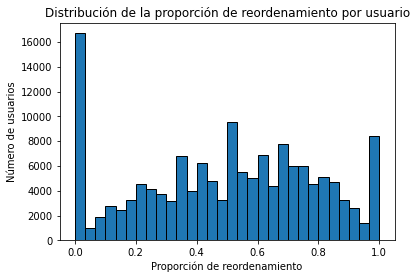

In [52]:
plt.hist(user_product_counts['reorder_ratio'], bins=30, edgecolor='black')
plt.xlabel('Proporción de reordenamiento')
plt.ylabel('Número de usuarios')
plt.title('Distribución de la proporción de reordenamiento por usuario')
plt.show()


### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [53]:
primeros_añadidos = order_products[order_products['add_to_cart_order'] == 1]

# Encuentra los 20 product_id más populares para los artículos que fueron agregados primero al carrito
top_20_del_carrito = primeros_añadidos['product_id'].value_counts().head(20).index.tolist()

# Luego, utiliza estos product_id para obtener sus nombres del data frame 'products'
top_20_del_carrito_nombres = products[products['product_id'].isin(top_20_del_carrito)][['product_id', 'product_name']]

# Ordena los productos por su popularidad
top_20_del_carrito_nombre = top_20_del_carrito_nombres.set_index('product_id').loc[top_20_del_carrito].reset_index()

print(top_20_del_carrito_nombres)

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
22934       22935         Organic Yellow Onion
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


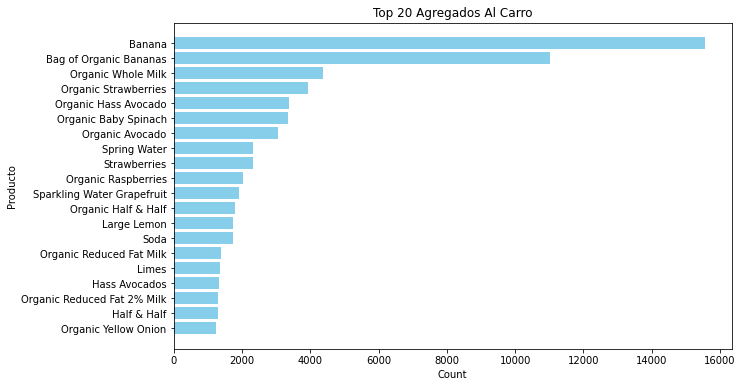

In [54]:
primeros_añadidos = order_products[order_products['add_to_cart_order'] == 1]
top_20_del_carrito = primeros_añadidos['product_id'].value_counts().head(20)

top_20_del_carrito_nombres = products[products['product_id'].isin(top_20_del_carrito.index)][['product_id', 'product_name']]
top_20_del_carrito_nombres = top_20_del_carrito_nombres.set_index('product_id').loc[top_20_del_carrito.index].reset_index()

top_20 = pd.DataFrame({'product_name': top_20_del_carrito_nombres['product_name'], 'count': top_20_del_carrito.values})


plt.figure(figsize=(10,6))
plt.barh(top_20['product_name'], top_20['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Producto')
plt.title('Top 20 Agregados Al Carro')
plt.gca().invert_yaxis() 
plt.show()

Esto reafirma los anteriores top 20

### Conclusion general del proyecto:

Las personas que usan esta aplicación en general son muy eficientes y organizadas con sus compras, eso se nota en que la mayoria solo pide una vez al mes
y haciendo una compra sola compra grande y planeada en lugar de muchas compras pequeñas, ademas se preocupan por la alimentacion, como se refleja en los
alimentos top de ventas los cuales son frutas y productos organicos